## Задание 1

Импортируйте библиотеки `pandas, numpy` и `matplotlib`.      
Загрузите `"Boston House Prices dataset"` из встроенных наборов данных библиотеки `sklearn`.    
Создайте датафреймы X и y из этих данных.   
Разбейте эти датафреймы на тренировочные `(X_train, y_train)` и тестовые `(X_test, y_test)`
с помощью функции `train_test_split` так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.  
Масштабируйте данные с помощью `StandardScaler`.    
Постройте модель TSNE на тренировочный данных с параметрами:  

`n_components=2, learning_rate=250, random_state=42`.    

Постройте диаграмму рассеяния на этих данных.  


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [93]:
boston = load_boston()

In [94]:
data = boston.data
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = boston.target

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [96]:
scaler = StandardScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train)

In [98]:
X_test_scaled = scaler.transform(X_test)

In [99]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


In [100]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [101]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

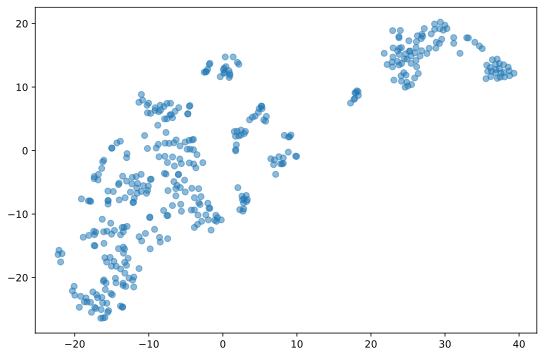

In [102]:
plt.figure(figsize = (9, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5)
plt.show()

## Задание 2  

С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма `X_train`.      
Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`,
и раскрасьте точки из разных кластеров разными цветами.  
Вычислите средние значения `price` и `CRIM` в разных кластерах.


In [103]:
from sklearn.cluster import KMeans

In [104]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [105]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

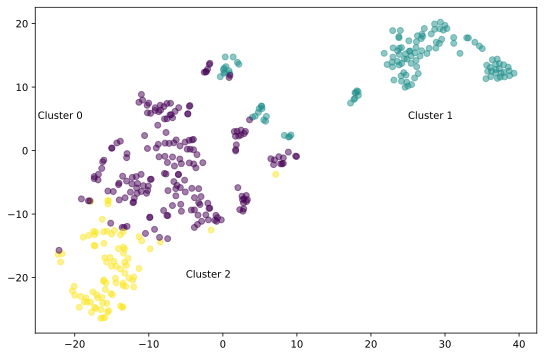

In [106]:
plt.figure(figsize = (9, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, alpha=0.5)
plt.text(-25, 5, 'Cluster 0')
plt.text(25, 5, 'Cluster 1')
plt.text(-5, -20, 'Cluster 2')
plt.show()

In [107]:
np.unique(labels_train)

array([0, 1, 2], dtype=int32)

**Mean price for each cluster (train)**

In [108]:
def count_mean_price_and_CRIM(y_data, X_data, labels_data):
    for label in np.unique(labels_data):
        mean_price = y_data[labels_data == label].mean()
        mean_CRIM = X_data.loc[labels_data == label, 'CRIM'].mean()
        print(f'Label {label}', f'Mean price: {mean_price}, Mean CRIM: {mean_CRIM}', sep='\n')

In [109]:
count_mean_price_and_CRIM(y_train, X_train, labels_train)

Label 0
Mean price: 24.958115183246072, Mean CRIM: 0.4216602094240837
Label 1
Mean price: 16.165354330708663, Mean CRIM: 10.797028425196851
Label 2
Mean price: 27.78837209302326, Mean CRIM: 0.07356558139534884


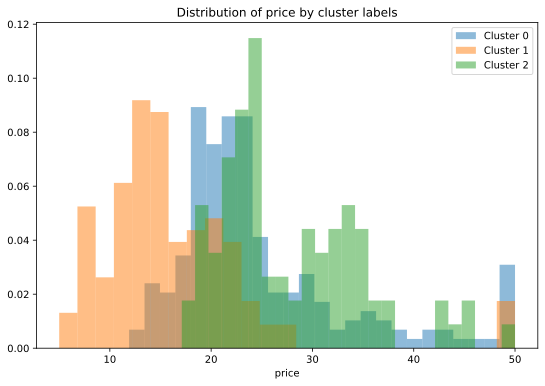

In [110]:
plt.figure(figsize = (9, 6))
plt.hist(y_train[labels_train == 0], bins=25, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=25, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=25, density=True, alpha=0.5)
plt.title('Distribution of price by cluster labels')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('price')
plt.show()

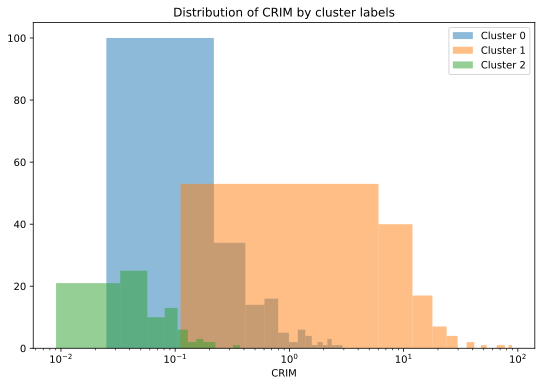

In [111]:
plt.figure(figsize=(9, 6))
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=15, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=15, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=15, alpha=0.5)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Distribution of CRIM by cluster labels')
plt.xlabel('CRIM')
plt.xscale(value='log')
# plt.yscale(value='log')
plt.show()

## *Задание 3

Примените модель `KMeans`, построенную в предыдущем задании,
к данным из тестового набора.  
Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.

In [112]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

In [113]:
count_mean_price_and_CRIM(y_test, X_test, labels_test)

Label 0
Mean price: 21.860784313725492, Mean CRIM: 0.2660788235294118
Label 1
Mean price: 16.43714285714286, Mean CRIM: 10.165531142857143
Label 2
Mean price: 31.35, Mean CRIM: 0.06206


## *Задание 4
Обучите любую модель регрессии на этом же датасете.  
Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным.   
Сравнить качество без метки кластера и с ней по отложенной выборке.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [115]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr и rf без метки кластера

In [116]:
lr.fit(X_train_scaled, y_train)
y_test_predict = lr.predict(X_test_scaled)

r2_score(y_test, y_test_predict)

0.668759493535632

In [117]:
rf.fit(X_train_scaled, y_train)
y_test_predict = rf.predict(X_test_scaled)

r2_score(y_test, y_test_predict)

0.8920995891343227

Добавим новый признак - метку кластера

In [118]:
X_train_scaled['Labels'] = labels_train
X_test_scaled['Labels'] = labels_test
X_test_scaled.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Labels
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210,0
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094,2
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338,1


lr и rf c меткой кластера

In [120]:
lr.fit(X_train_scaled, y_train)
y_test_predict = lr.predict(X_test_scaled)

r2_score(y_test, y_test_predict)

0.6688794358164192

In [121]:
rf.fit(X_train_scaled, y_train)
y_test_predict = rf.predict(X_test_scaled)

r2_score(y_test, y_test_predict)

0.8890551567393657

Видно, что линейная регрессия стала немного лучше, а случайный лес немного хуже

## *Задание 5

Загрузите "wine dataset" из встроенных наборов данных библиотеки sklearn.  
Создайте датафреймы X и y из этих данных.  
Разбейте эти датафреймы на тренировочные и тестовые.  
Масштабируйте данные.  
Постройте модель понижения размерности на тренировочный данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.  
С помощью модели кластеризации (поэкспериментируйте и с другими моделями, не только с KMeans) разбейте данные из тренировочного набора на необходимое количество кластеров.  
Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами.  
Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным.  
Сделайте вывод, какие модели лучше себя показывают на этой задаче.

In [311]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

In [312]:
wine = load_wine()

In [313]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [314]:
scaler = MinMaxScaler()

In [315]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=feature_names)

In [318]:
tsne = TSNE(n_components=2, learning_rate=230, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(124, 2)

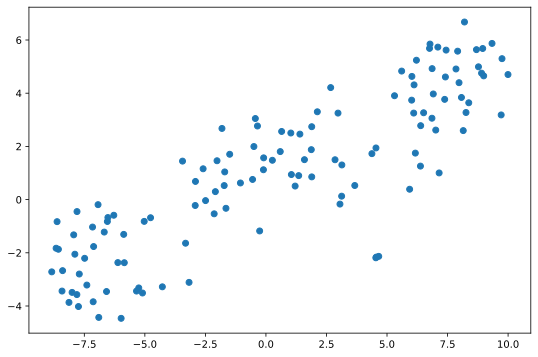

In [319]:
plt.figure(figsize=(9, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

**KMeans модель**

In [320]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
X_train_scaled['KMeans'] = kmeans.fit_predict(X_train_scaled)
X_train_scaled['KMeans'].value_counts()

1    47
2    41
0    36
Name: KMeans, dtype: int64

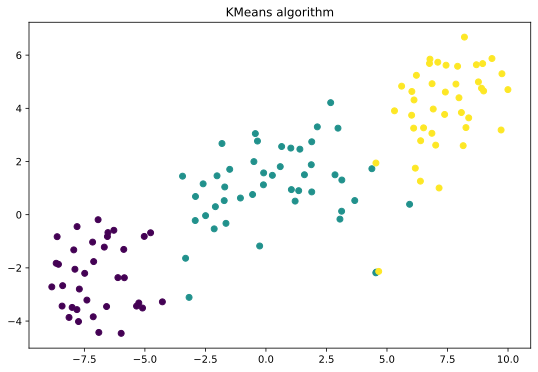

In [321]:
plt.figure(figsize=(9, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_scaled['KMeans'])
plt.title('KMeans algorithm')
plt.show()

**Agglomerative Clustering модель**

In [322]:
from sklearn.cluster import AgglomerativeClustering

In [323]:
ag_c = AgglomerativeClustering(n_clusters=3)
X_train_scaled['AggClust'] = ag_c.fit_predict(X_train_scaled)
X_train_scaled['AggClust'].value_counts()

0    47
2    41
1    36
Name: AggClust, dtype: int64

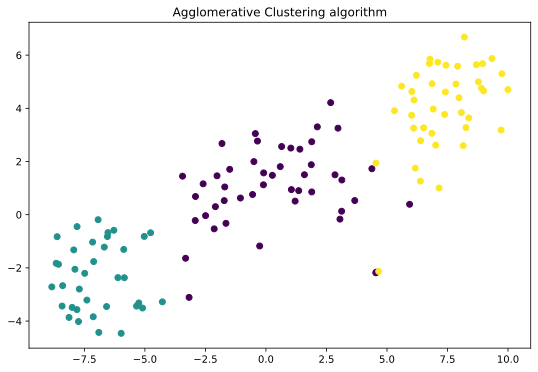

In [324]:
plt.figure(figsize=(9, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_scaled['AggClust'])
plt.title('Agglomerative Clustering algorithm')
plt.show()

На этих данных не очень видно разницу, как как обе модели разбили данные одинаково

## *Задание 6
Используйте "Olivetti faces data-set from AT&T" из встроенных наборов данных библиотеки sklearn.  
Обучить любую модель классификации на этом датасете до применения PCA (количество компонент подберите самостоятельно) и после него.   
Сравнить качество классификации по отложенной выборке.

In [276]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [277]:
olivetti = fetch_olivetti_faces()

In [278]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [287]:
X = pd.DataFrame(olivetti.data)
y = olivetti.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [288]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [290]:
gb_1 = GradientBoostingClassifier(random_state=42)

gb_1.fit(X_train, y_train)
y_pred = gb_1.predict(X_test)
accuracy_score(y_test, y_pred)

0.53

In [291]:
lr = LogisticRegression(max_iter=5000)

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.96

In [292]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)
pca.explained_variance_ratio_

array([2.56872267e-01, 1.20740794e-01, 8.35704878e-02, 4.62311655e-02,
       3.54789905e-02, 3.01203765e-02, 2.32654251e-02, 2.21574772e-02,
       2.05054823e-02, 1.76360812e-02, 1.49283772e-02, 1.36989476e-02,
       1.29230227e-02, 1.25373891e-02, 1.17325224e-02, 1.05984965e-02,
       9.05179139e-03, 8.40414688e-03, 8.02803598e-03, 7.37671833e-03,
       7.08438177e-03, 6.61535049e-03, 6.48088846e-03, 5.69091272e-03,
       5.63751906e-03, 5.33643318e-03, 5.20755304e-03, 4.91148466e-03,
       4.73984284e-03, 4.44614096e-03, 4.17832704e-03, 3.90633475e-03,
       3.76508175e-03, 3.56449210e-03, 3.36153479e-03, 3.32792592e-03,
       3.16934008e-03, 3.09023354e-03, 2.94958195e-03, 2.84122489e-03,
       2.69945525e-03, 2.63550691e-03, 2.59996857e-03, 2.56728614e-03,
       2.44736136e-03, 2.39844550e-03, 2.32491270e-03, 2.27007107e-03,
       2.18256377e-03, 2.16269889e-03, 2.03453726e-03, 1.99712184e-03,
       1.92870398e-03, 1.80953857e-03, 1.75296573e-03, 1.73375010e-03,
      

In [308]:
pca = PCA(n_components=11 , random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [309]:
gb_2 = GradientBoostingClassifier(random_state=42)

gb_2.fit(X_train_pca, y_train)
y_pred = gb_2.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.59

In [310]:
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.86

Качество классификации у модели градиентного бустинга стала лучше после уменьшения размерности, но модель логистической регрессии ухудшилась (возможно, для каждой модели нужно разное количество компонент подбирать), плюс не очень понятно, почему бустинг хуже оказался (изначально я обучила)